# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [3]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
27,LUANA,0,354625,28,F
101,GISELE,0,164780,102,F
138,NEUSA,0,114846,139,F
168,IARA,0,94418,169,F
119,IRENE,0,136808,120,F


In [4]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
151,JOSUE,0,91332,152,M
70,JOAQUIM,0,213941,71,M
56,DOUGLAS,0,264889,57,M
55,FLAVIO,0,265201,56,M
91,WESLEY,0,156101,92,M


In [5]:
print("Qauntidade nomes: " + str(len(nomes_f) +  len(nomes_m)))

Qauntidade nomes: 400


In [6]:
frames = [nomes_m, nomes_f]

In [7]:
nomes = pd.concat(frames)['nome'].to_frame()

In [8]:
nomes.sample(5)

,nome
141,NEIDE
165,EUNICE
129,AILTON
124,CESAR
91,CELIA


# Incluindo o ID dos valores

In [9]:
import numpy as np
np.random.seed(123)

In [10]:
total_alunos = len(nomes)
total_alunos

400

In [11]:
nomes.sample(3)

,nome
34,CRISTIANE
42,MATHEUS
103,KATIA


In [12]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [13]:
nomes.sample(5)

,nome,id_aluno
46,LUCIANO,373
159,ARNALDO,29
3,FRANCISCO,383
97,OSVALDO,71
64,VIVIANE,188


In [14]:
dominios = ['@dominioemail.com.br', '@servicoemail.com.br']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes

,nome,id_aluno,dominio
0,JOSE,189,@servicoemail.com.br
1,JOAO,58,@servicoemail.com.br
2,ANTONIO,204,@dominioemail.com.br
3,FRANCISCO,383,@dominioemail.com.br
4,CARLOS,231,@dominioemail.com.br
...,...,...,...
195,ROSANE,9,@servicoemail.com.br
196,IVONETE,378,@dominioemail.com.br
197,LUCIANE,50,@dominioemail.com.br
198,ISADORA,244,@servicoemail.com.br


In [15]:
nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()
nomes.sample(5)

,nome,id_aluno,dominio,email
190,LURDES,72,@servicoemail.com.br,lurdes@servicoemail.com.br
104,EVA,351,@servicoemail.com.br,eva@servicoemail.com.br
193,KAUAN,120,@servicoemail.com.br,kauan@servicoemail.com.br
98,GILSON,12,@dominioemail.com.br,gilson@dominioemail.com.br
2,FRANCISCA,122,@dominioemail.com.br,francisca@dominioemail.com.br


# Criando a tabela Cursos

In [16]:
!pip install html5lib
!pip install lxml
import html5lib

In [17]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos = cursos[0]

### Alterando o index de cusros

In [18]:
cursos = cursos.rename(columns={'Nome do curso':'nome_do_curso'})
cursos['id'] = cursos.index + 1
cursos = cursos.set_index('id')

cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


### Matriculando os alunos nos cursos

In [19]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)

nomes.matriculas.describe()

count    400.000000
mean       2.125000
std        1.503338
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

<AxesSubplot:xlabel='matriculas', ylabel='Count'>

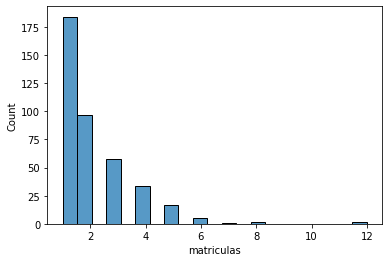

In [20]:
import seaborn as sns

sns.histplot(nomes.matriculas)

In [21]:
nomes.matriculas.value_counts()

1     184
2      97
3      58
4      34
5      17
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

### Selecionando cursos

In [22]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [23]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p=prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno','id_curso'])

matriculas.head(10)

,id_aluno,id_curso
0,189,13
1,189,6
2,189,2
3,58,5
4,58,13
5,204,6
6,383,8
7,231,14
8,285,17
9,285,20


In [24]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(
    cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

### Saída em diferentes formatos

In [25]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv',index=False)

matriculas_por_curso.to_json('matriculas_por_curso.json')

matriculas_por_curso.to_html('matriculas_por_curso.html')

### Trabalhando com Sql

In [26]:
from sqlalchemy import create_engine, inspect

In [27]:
engine = create_engine('sqlite:///:memory:')

In [28]:
matriculas_por_curso.to_sql('matriculas', engine)

In [29]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


In [30]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [31]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,18,C# para Web
1,4,7,Ruby on Rails
2,10,7,Código limpo com C#
3,14,14,Desenvolvendo jogos
4,19,19,Boas práticas em Java


In [32]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso','quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Java para Web,40
1,C# para Web,18
2,Ruby on Rails,7
3,Cursos de Python,66
4,PHP com MySql,34
5,.NET para web,20
6,Novas integrações com Java,119
7,TDD com Java,28
8,Código limpo com C#,7
9,Preparatório para certificação Java,54


In [33]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso','quantidade_de_alunos'])

muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [34]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [35]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas', 'muitas_matriculas']


### Trabalhando com arquivos Excel

In [36]:
id_curso = 16

proxima_turma = matriculas.query(f'id_curso == {id_curso}')

proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
285,16,PAULO,@dominioemail.com.br,paulo@dominioemail.com.br,7
237,16,LUCAS,@dominioemail.com.br,lucas@dominioemail.com.br,3
5,16,LUIZ,@dominioemail.com.br,luiz@dominioemail.com.br,5
169,16,RAIMUNDO,@dominioemail.com.br,raimundo@dominioemail.com.br,2
266,16,DOUGLAS,@servicoemail.com.br,douglas@servicoemail.com.br,2
6,16,DANILO,@servicoemail.com.br,danilo@servicoemail.com.br,3
274,16,JONAS,@servicoemail.com.br,jonas@servicoemail.com.br,2
300,16,VALTER,@servicoemail.com.br,valter@servicoemail.com.br,2
84,16,EVANDRO,@servicoemail.com.br,evandro@servicoemail.com.br,5


In [37]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
285       PAULO
237       LUCAS
5          LUIZ
169    RAIMUNDO
266     DOUGLAS
6        DANILO
274       JONAS
300      VALTER
84      EVANDRO
26      NICOLAS
185      ISMAEL
198        RIAN
38      JONATAN
158     BEATRIZ
161       SUELI
288      DAIANE
243     MICHELE
371       VILMA
154      KARINA
116      CLEIDE
180     TAINARA
260      JOELMA
379        INES
115      TERESA
234       CLARA
378     IVONETE
Name: nome, dtype: object

In [38]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
285,PAULO
237,LUCAS
5,LUIZ
169,RAIMUNDO
266,DOUGLAS
6,DANILO
274,JONAS
300,VALTER
84,EVANDRO


In [39]:
nome_curso = cursos.loc[id_curso]
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [40]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma = proxima_turma.rename(columns={'nome':f'Alunos do curso de {nome_curso}'})

In [41]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)